<h3>Small remark</h3>

We use first qubits_for_hypercube many qubits for the hypercube vertices, and last qubits_for_direction many qubits for the directions. We implement all operations on a space of (qubits_for_hypercube + qubits_for_direction) qubits.

<h3>Parameters</h3>

In [116]:
qubits_for_direction = 3
iteration_count = 6

qubits_for_hypercube = 2**qubits_for_direction

<h3>Diffusion transformation</h3>

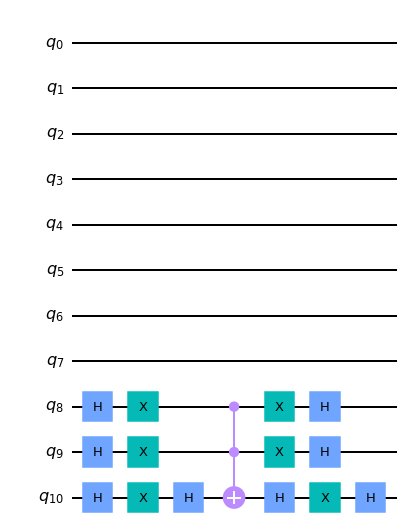

In [117]:
import qiskit
from qiskit import execute, Aer
from math import pi

diffusion_circuit = qiskit.QuantumCircuit(qubits_for_hypercube + qubits_for_direction)

control_qubits = []
for i in range(qubits_for_direction-1):
    control_qubits.append(qubits_for_hypercube+i)
    
for i in range(qubits_for_direction):
    diffusion_circuit.h(qubits_for_hypercube+i)

for i in range(qubits_for_direction):
    diffusion_circuit.x(qubits_for_hypercube+i)
    
diffusion_circuit.h(qubits_for_hypercube+qubits_for_direction-1)
diffusion_circuit.mct(control_qubits, qubits_for_hypercube+qubits_for_direction-1)
diffusion_circuit.h(qubits_for_hypercube+qubits_for_direction-1)

for i in range(qubits_for_direction):
    diffusion_circuit.x(qubits_for_hypercube+i)

for i in range(qubits_for_direction):
    diffusion_circuit.h(qubits_for_hypercube+i)

diffusion_circuit.draw(output='mpl')

<h3>Shift transformation</h3>

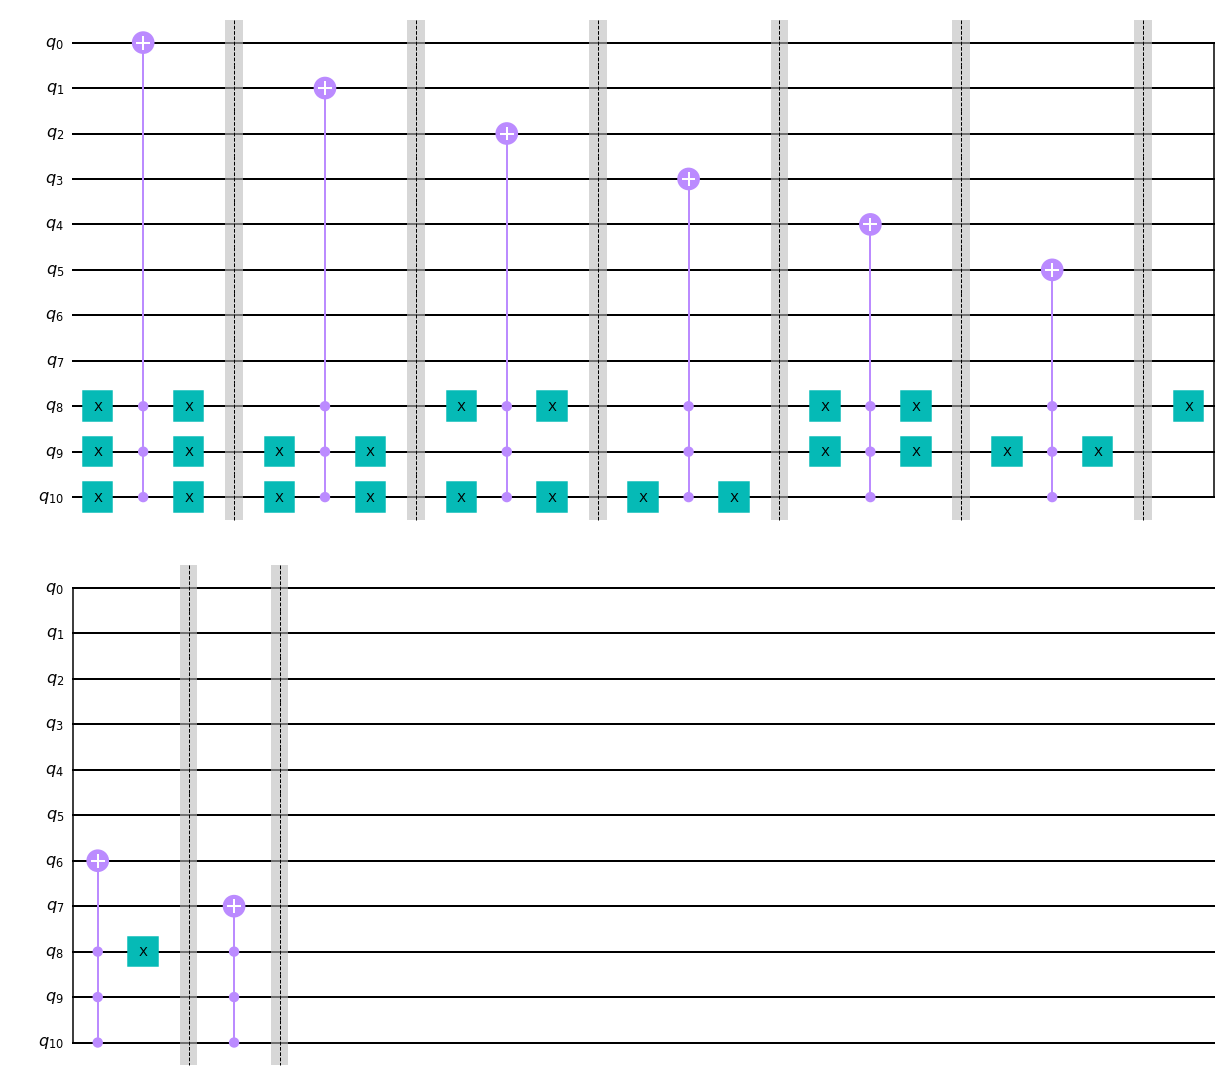

In [118]:
import qiskit
from qiskit import execute, Aer
from math import pi

shift_circuit = qiskit.QuantumCircuit(qubits_for_hypercube + qubits_for_direction)

format_string = '0' + str(qubits_for_direction) + 'b'

control_qubits = []
for i in range(qubits_for_direction):
    control_qubits.append(qubits_for_hypercube+i)

for i in range(qubits_for_hypercube):
    binary_state_value = format(i, format_string)
    for j in range(qubits_for_direction):
        if (binary_state_value[j] == '0'):
            shift_circuit.x(qubits_for_hypercube+qubits_for_direction-1-j)
    shift_circuit.mct(control_qubits, i)
    for j in range(qubits_for_direction):
        if (binary_state_value[j] == '0'):
            shift_circuit.x(qubits_for_hypercube+qubits_for_direction-1-j)
    shift_circuit.barrier()

shift_circuit.draw(output='mpl')

<h3>Complete circuit</h3>

In [119]:
import qiskit
from qiskit import execute, Aer
from math import pi

complete_circuit = qiskit.QuantumCircuit(qubits_for_hypercube + qubits_for_direction, qubits_for_hypercube)

# Initial state
for i in range(qubits_for_direction):
    complete_circuit.h(qubits_for_hypercube+i)

# QWalk operations
for i in range(iteration_count):
    complete_circuit = complete_circuit.compose(diffusion_circuit)
    complete_circuit = complete_circuit.compose(shift_circuit)

complete_circuit.measure(range(qubits_for_hypercube),range(qubits_for_hypercube))

job = execute(complete_circuit,Aer.get_backend('qasm_simulator'),shots=1000000)
counts = job.result().get_counts(complete_circuit)
print(counts)

{'11110011': 10343, '11010001': 7165, '10010110': 7130, '11000000': 7378, '11101011': 10257, '01110100': 7085, '00110101': 7161, '00101011': 7159, '10011100': 7121, '11011101': 10230, '11100111': 10279, '01000100': 7350, '01010101': 7157, '00001001': 7138, '10100000': 7232, '11001111': 10321, '11100100': 7238, '00110110': 7166, '01000111': 7166, '01111011': 9988, '01101010': 7233, '11011000': 7231, '10010000': 7308, '00100001': 7368, '00111111': 10408, '11101101': 10322, '11000110': 7124, '01011100': 7170, '01100000': 7353, '11111010': 10246, '00101101': 7136, '00110011': 7128, '11001100': 7195, '11100001': 7146, '10110111': 10357, '11110101': 10205, '11111100': 10189, '01100011': 6964, '00111010': 7162, '00111001': 7216, '11000011': 7214, '11010010': 7279, '00100100': 7261, '00111100': 7076, '10111011': 10320, '10110010': 7064, '01010110': 7195, '01110001': 7241, '01001101': 7125, '10010011': 7065, '00100010': 7322, '11010100': 7140, '10100101': 7232, '10111101': 10152, '10111000': 72

In [120]:
format_string = '0' + str(qubits_for_hypercube) + 'b'
max_value = 0
for i in range(2**qubits_for_hypercube):
    binary_state_value = format(i, format_string)
    if(binary_state_value in counts):
        if(max_value < counts[binary_state_value]):
            max_value = counts[binary_state_value]
print('Maximum probability is',max_value/1000000)

Maximum probability is 0.010478
